__Sprocket Central Pty Ltd__ , a medium size bikes & cycling accessories organisation, has approached Tony Smith (Partner) in KPMG’s Lighthouse & Innovation Team. Sprocket Central Pty Ltd  is keen to learn more about KPMG’s expertise in its Analytics, Information & Modelling team.


__Steps Undertaken__:

1. Data Reading


2. Data Preprocessing


3. Exploratory Data Analysis


4. Final Analysis and Recommendation
    

In [1]:
# Importing  Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading the File
data=pd.read_csv("/Users/jasdeepmonga/Library/Containers/com.microsoft.Excel/Data/Downloads/CustomerDemographics.csv",header=1)
data.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

In [4]:
# Dropping Unwanted Imported Columns
data.drop(data.iloc[:,13:26],axis=1,inplace=True)

In [5]:
# Dataset Shape
data.shape

(4000, 13)

In [6]:
# No. of Null Values present in each column
data.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [7]:
# Imputing the Missing Values in the columns
data['last_name']=data['last_name'].fillna('None')

In [8]:
# Job Title
data['job_title']=data['job_title'].fillna('Unknown')

In [9]:
# Job Industry Category
data['job_industry_category']=data['job_industry_category'].fillna('Unknown')

In [10]:
# Droping Default column since it is not required
data.drop(['default'],axis=1,inplace=True)

In [11]:
# Tenure
data['tenure']=data['tenure'].fillna(data['tenure'].mean())

In [12]:
# DOB Imputing Missing Values with Most Frequent Value
data['DOB'].describe()

count           3913
unique          3448
top       1978-01-30
freq               7
Name: DOB, dtype: object

In [13]:
#DOB
data['DOB']=data['DOB'].fillna('1978-01-30')

In [14]:
# Checking the Null Values
data.isnull().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
dtype: int64

In [15]:
data['gender'].value_counts()

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

In [16]:
data['gender'].replace('F','Female',inplace=True)
data['gender'].replace('Femal','Female',inplace=True)
data['gender'].replace('M','Male',inplace=True)
data['gender'].replace('U','Other',inplace=True)

In [17]:
data.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,None,Male,33,1961-10-03,Unknown,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Unknown,Affluent Customer,N,Yes,8.0


In [18]:
# Changing datatype of DOB
data['DOB']=pd.to_datetime(data['DOB'])

In [19]:
# Calculating 'Age' of the Customer based on DOB

from datetime import date,datetime

now=datetime.now()

data['Age']=now.year-data['DOB'].dt.year

In [20]:
data.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,68
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,41
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,67
3,4,Talbot,None,Male,33,1961-10-03,Unknown,IT,Mass Customer,N,No,7.0,60
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Unknown,Affluent Customer,N,Yes,8.0,44


In [21]:
# Statisticsl Information 
data['Age'].describe()

count    4000.000000
mean       43.948250
std        12.657216
min        19.000000
25%        35.000000
50%        44.000000
75%        53.000000
max       178.000000
Name: Age, dtype: float64

In [22]:
data[data['Age']==178]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
33,34,Jephthah,Bachmann,Other,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0,178


1. Age of one customers is around 178.

2. If we see the Mean Age of customer we have customers aging from 44 years and more.

In [23]:
# Checking Duplicate Values
data.duplicated().sum()

0

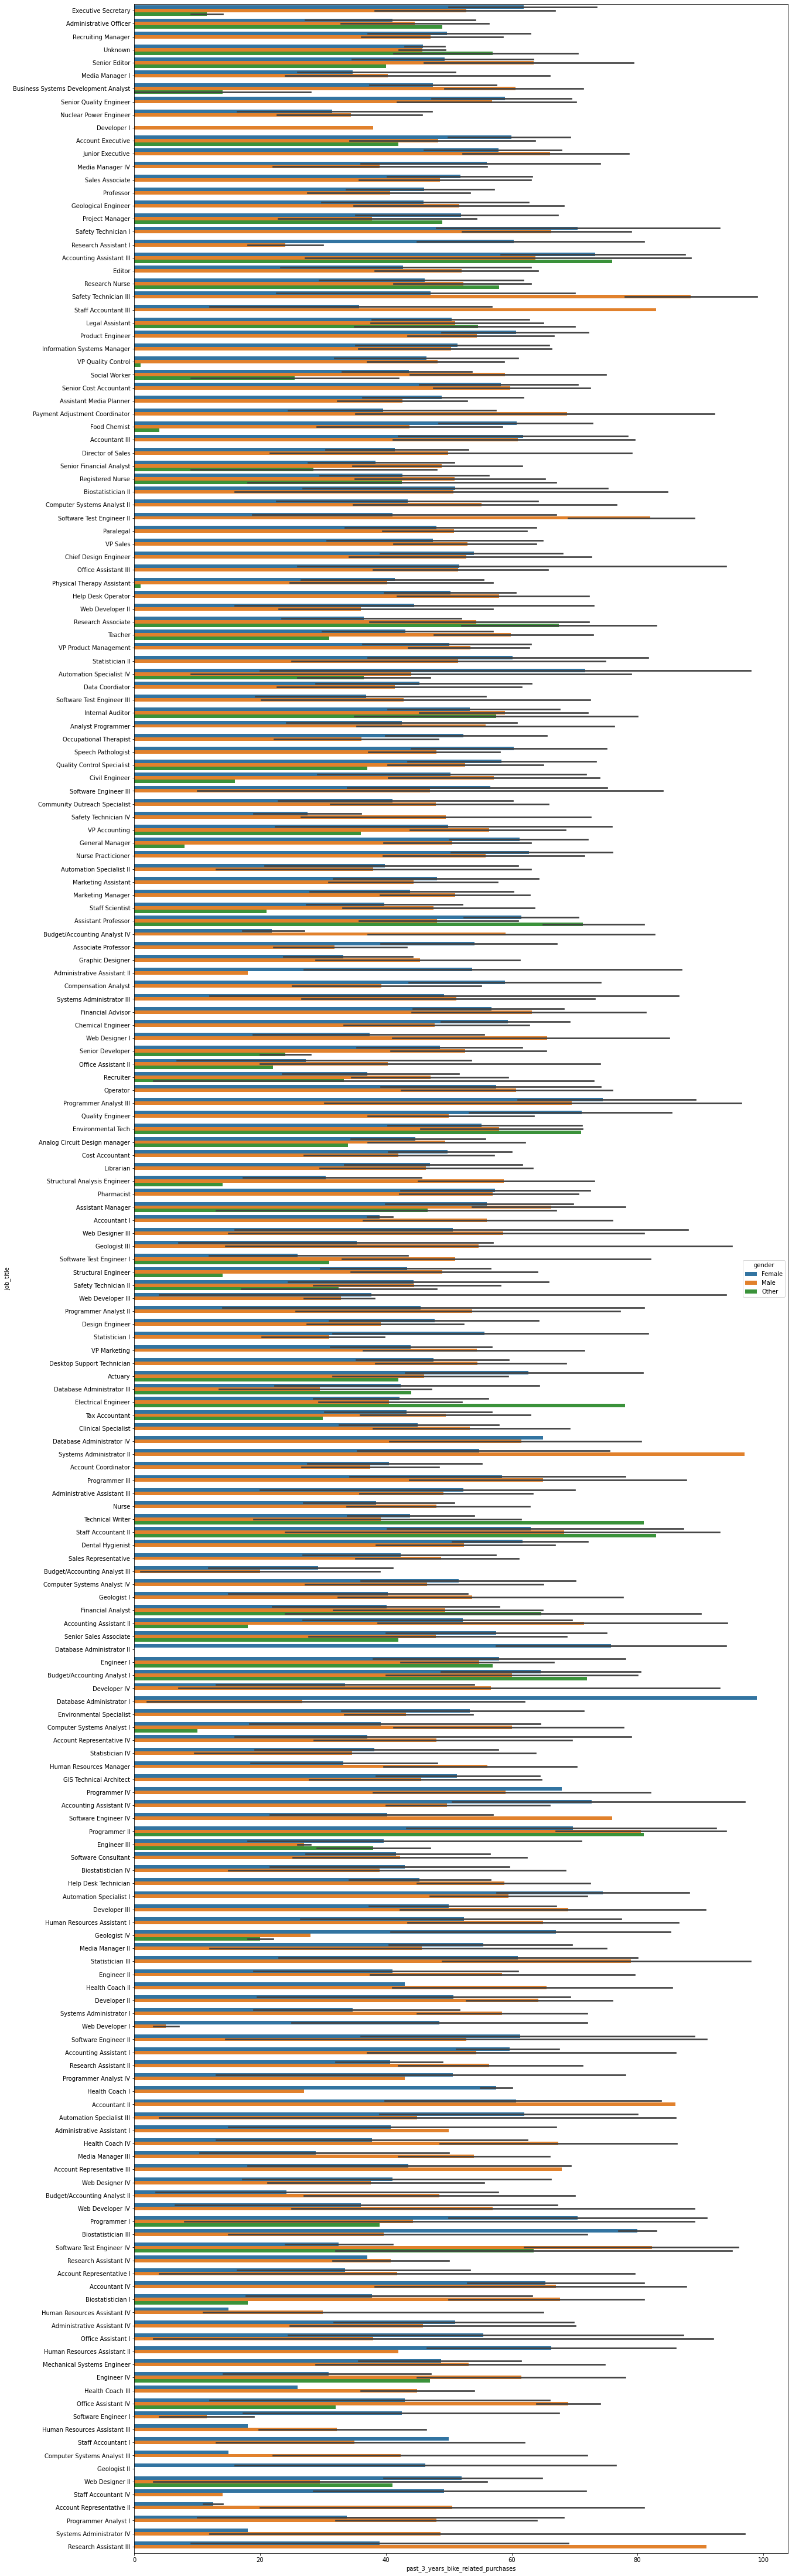

In [24]:
# Bike Purchase v/s Job Title
plt.figure(figsize=(20,80))
sns.barplot(x='past_3_years_bike_related_purchases',y='job_title',data=data,hue='gender')
plt.show()

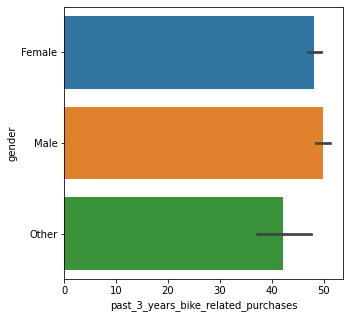

In [25]:
# Bike Purchase v/s Gender
plt.figure(figsize=(5,5))
sns.barplot(x='past_3_years_bike_related_purchases',y='gender',data=data)
plt.show()

In [26]:
# Car Owners
data['owns_car'].value_counts()

Yes    2024
No     1976
Name: owns_car, dtype: int64

In [27]:
# Job_Industry
data['job_industry_category'].value_counts()

Manufacturing         799
Financial Services    774
Unknown               656
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

In [28]:
# Wealth Segemnt
data['wealth_segment'].value_counts()

Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: wealth_segment, dtype: int64

In [29]:
# Tenure
data['tenure'].describe()

count    4000.000000
mean       10.657041
std         5.598238
min         1.000000
25%         6.000000
50%        10.657041
75%        15.000000
max        22.000000
Name: tenure, dtype: float64

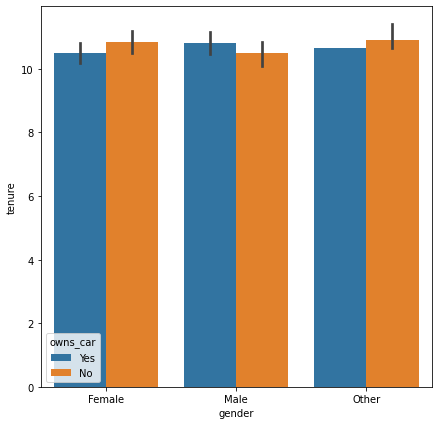

In [30]:
# Tenure v/s Gender
plt.figure(figsize=(7,7))
sns.barplot(x='gender',y='tenure',data=data,hue='owns_car')
plt.show()

#### Customer Address-Dataset



In [31]:
data2=pd.read_csv("/Users/jasdeepmonga/Library/Containers/com.microsoft.Excel/Data/Downloads/CustomerAddress.csv",header=1)
data2.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [32]:
# Shape of Dataset
data2.shape

(3999, 6)

In [33]:
#Info
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


#### No Null Value is present

In [34]:
# Statistical Info
data2.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


In [35]:
# Duplicate Record Check
data2.duplicated().sum()

0

#### No duplicate records are present

In [36]:
# Checking Values
data2['country'].value_counts()

Australia    3999
Name: country, dtype: int64

In [37]:
#State
data2['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [38]:
# Combining the Similar entries
data2['state'].replace('VIC','Victoria',inplace=True)
data2['state'].replace('NSW','New South Wales',inplace=True)
data2['state'].replace('QLD','Queensland',inplace=True)

### Combining the above 2 Datasets

In [39]:
# New Dataset
data3=pd.merge(data,data2,how='inner',on='customer_id')
data3.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,68,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,41,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,Talbot,None,Male,33,1961-10-03,Unknown,IT,Mass Customer,N,No,7.0,60,0 Holy Cross Court,4211,Queensland,Australia,9
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Unknown,Affluent Customer,N,Yes,8.0,44,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,Curr,Duckhouse,Male,35,1966-09-16,Unknown,Retail,High Net Worth,N,Yes,13.0,55,9 Oakridge Court,3216,Victoria,Australia,9


In [40]:
# Shape
data3.shape

(3996, 18)

There are 3996 rows and 18 columns.

In [41]:
# Info
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3996 entries, 0 to 3995
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3996 non-null   int64         
 1   first_name                           3996 non-null   object        
 2   last_name                            3996 non-null   object        
 3   gender                               3996 non-null   object        
 4   past_3_years_bike_related_purchases  3996 non-null   int64         
 5   DOB                                  3996 non-null   datetime64[ns]
 6   job_title                            3996 non-null   object        
 7   job_industry_category                3996 non-null   object        
 8   wealth_segment                       3996 non-null   object        
 9   deceased_indicator                   3996 non-null   object        
 10  owns_car    

In [42]:
# Deceased_indicator 
data3['deceased_indicator'].value_counts()

N    3994
Y       2
Name: deceased_indicator, dtype: int64

In [43]:
# Highest Bike Related Purchases in a state
purchase=data3.groupby(['state'])['past_3_years_bike_related_purchases'].sum().reset_index().sort_values(by='past_3_years_bike_related_purchases',ascending=False)
purchase.head()


,state,past_3_years_bike_related_purchases
0,New South Wales,104673
2,Victoria,49385
1,Queensland,41270


1. People in NSW have purchased the Maximum No. of Bikes in the last 3 years.


2. Victoria is 2nd in no. with 49,385 bikes purchased.

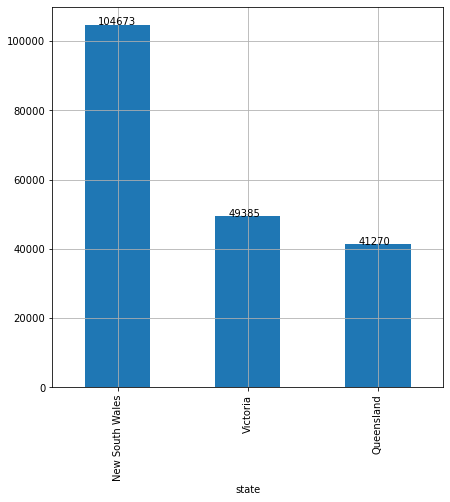

In [44]:
# Highest Purchase
plt.figure(figsize=(7,7))
purchase=data3.groupby(['state'])['past_3_years_bike_related_purchases'].sum()
ax=purchase.sort_values(ascending=False).plot.bar()

# To display the count
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))
plt.grid()
plt.show()

In [45]:
# Gender category
gender=data3.groupby(['gender','state','wealth_segment'])['past_3_years_bike_related_purchases'].sum().reset_index().sort_values(by='past_3_years_bike_related_purchases',ascending=False)
gender.head()

,gender,state,wealth_segment,past_3_years_bike_related_purchases
2,Female,New South Wales,Mass Customer,27391
11,Male,New South Wales,Mass Customer,25473
1,Female,New South Wales,High Net Worth,13132
0,Female,New South Wales,Affluent Customer,12598
8,Female,Victoria,Mass Customer,12575


1. Females in New South Wales which are __Mass Customers__ of Sprocket Central Pty Ltd have purchased maximum no. of bikes in the past 3 years which is around 27,391.


2. Males in New South Wales which are __Mass Customers__ of procket Central Pty Ltd have purchased around 25,473 bikes.


3. Clearly, it represents that Females are much more inclined towards bike purchases.

In [46]:
# Category
job_category=data3.groupby(['job_industry_category'])['past_3_years_bike_related_purchases'].sum().reset_index().sort_values(by='past_3_years_bike_related_purchases',ascending=False)
job_category.head()

,job_industry_category,past_3_years_bike_related_purchases
5,Manufacturing,39272
2,Financial Services,37444
9,Unknown,32123
3,Health,30054
7,Retail,17301


1. People working in the Manufacturing category have the highest bikes purchased with 39k bikes purchased.


2. Financial Services category people have purchased around 37k bikes.

In [47]:
# Age
age=data3.groupby(['Age'])['past_3_years_bike_related_purchases'].sum().reset_index().sort_values(by='past_3_years_bike_related_purchases',ascending=False)
age.head()

,Age,past_3_years_bike_related_purchases
24,43,14879
25,44,9848
28,47,7608
26,45,7557
22,41,6545


1. People having age of 43 years have the highest bike related purchases in the last 3 years with 14,879 bikes purchased.


2. Next is the 44 years age category people with 9,848 bike related purchases.

### Transactions-Dataset

In [48]:
# Reading New Dataset
data4=pd.read_csv("/Users/jasdeepmonga/Library/Containers/com.microsoft.Excel/Data/Downloads/Transactions.csv",header=1)
data4.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,25/02/17,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,41245.0
1,2,3,3120,21/05/17,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,41701.0
2,3,37,402,16/10/17,False,Approved,OHM Cycles,Standard,low,medium,1793.43,$248.82,36361.0
3,4,88,3135,31/08/17,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,$381.10,36145.0
4,5,78,787,01/10/17,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,$709.48,42226.0


In [49]:
# Dataset Shape
data4.shape

(20000, 13)

In [50]:
#Info
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           20000 non-null  int64  
 1   product_id               20000 non-null  int64  
 2   customer_id              20000 non-null  int64  
 3   transaction_date         20000 non-null  object 
 4   online_order             19640 non-null  object 
 5   order_status             20000 non-null  object 
 6   brand                    19803 non-null  object 
 7   product_line             19803 non-null  object 
 8   product_class            19803 non-null  object 
 9   product_size             19803 non-null  object 
 10  list_price               20000 non-null  float64
 11  standard_cost            19803 non-null  object 
 12  product_first_sold_date  19803 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 2.0+ MB


#### There are null Values present in the Dataset

In [51]:
# Null Values
data4.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [52]:
data4['online_order'].value_counts()

True     9829
False    9811
Name: online_order, dtype: int64

In [53]:
# Online_order Null Values
data4[data4['online_order'].isnull()].head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
97,98,49,333,23/06/17,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,$400.13,37823.0
166,167,90,3177,26/04/17,NaN,Approved,Norco Bicycles,Standard,low,medium,363.01,$290.41,38482.0
169,170,6,404,16/10/17,NaN,Approved,OHM Cycles,Standard,high,medium,227.88,$136.73,37838.0
250,251,63,1967,11/04/17,NaN,Approved,Solex,Standard,medium,medium,1483.20,$99.59,42145.0
300,301,78,2530,24/03/17,NaN,Approved,Giant Bicycles,Standard,medium,large,1765.30,$709.48,35455.0


In [54]:
#FillNa-Online_orders
data4['online_order']=data4['online_order'].fillna('Not Known')

In [55]:
data4['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [56]:
# Brand-Null Values
data4[data4['brand'].isnull()].head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
136,137,0,431,23/09/17,False,Approved,NaN,NaN,NaN,NaN,1942.61,NaN,NaN
159,160,0,3300,27/08/17,False,Approved,NaN,NaN,NaN,NaN,1656.86,NaN,NaN
366,367,0,1614,10/03/17,False,Approved,NaN,NaN,NaN,NaN,850.89,NaN,NaN
406,407,0,2559,14/06/17,True,Approved,NaN,NaN,NaN,NaN,710.59,NaN,NaN
676,677,0,2609,02/07/17,False,Approved,NaN,NaN,NaN,NaN,1972.01,NaN,NaN


In [57]:
#Fillna-Brand 
data4['brand']=data4['brand'].fillna('Other')

In [58]:
# Product Line
data4['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [59]:
# Fillna-Product Line
data4['product_line']=data4['product_line'].fillna('Other')

In [60]:
# Product Class
data4['product_class'].value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [61]:
# Fillna-Product Class
data4['product_class']=data4['product_class'].fillna('Other')

In [62]:
# Product Size
data4['product_size'].value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

In [63]:
# Fillna-Product Size
data4['product_size']=data4['product_size'].fillna('Other')

In [64]:
# Null Values Standard Cost
data4[data4['standard_cost'].isnull()].head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
136,137,0,431,23/09/17,False,Approved,Other,Other,Other,Other,1942.61,NaN,NaN
159,160,0,3300,27/08/17,False,Approved,Other,Other,Other,Other,1656.86,NaN,NaN
366,367,0,1614,10/03/17,False,Approved,Other,Other,Other,Other,850.89,NaN,NaN
406,407,0,2559,14/06/17,True,Approved,Other,Other,Other,Other,710.59,NaN,NaN
676,677,0,2609,02/07/17,False,Approved,Other,Other,Other,Other,1972.01,NaN,NaN


In [65]:
data4.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,25/02/17,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,41245.0
1,2,3,3120,21/05/17,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,41701.0
2,3,37,402,16/10/17,False,Approved,OHM Cycles,Standard,low,medium,1793.43,$248.82,36361.0
3,4,88,3135,31/08/17,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,$381.10,36145.0
4,5,78,787,01/10/17,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,$709.48,42226.0


In [66]:
# Removing the $ symbol
data4['standard_cost']=data4['standard_cost'].str.replace('$',"").str.replace(',',"")

In [67]:
# Changing the datatype
data4['standard_cost']=pd.to_numeric(data4['standard_cost'])

In [68]:
# Doing Mean Imputation for Missing Values
data4['standard_cost']=data4['standard_cost'].fillna(data4['standard_cost'].mean())

In [69]:
# Doing Mean Imputation for Missing Values
data4['product_first_sold_date']=round(data4['product_first_sold_date'].fillna(data4['product_first_sold_date'].mean()),0)

In [70]:
#Checking Null values after imputation
data4.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [71]:
data4.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,25/02/17,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,21/05/17,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,16/10/17,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,31/08/17,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,01/10/17,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [72]:
# Max Purchased Brand
brand=data4.groupby(['customer_id'])['brand'].count().reset_index().sort_values(by='brand',ascending=False)
brand.head()

,customer_id,brand
2471,2476,14
2178,2183,14
1065,1068,14
1668,1672,13
2543,2548,13


In [73]:
# Mode of Order
round((data4['online_order'].value_counts()/len(data4.index)*100),2)

True         49.14
False        49.06
Not Known     1.80
Name: online_order, dtype: float64

In [74]:
# Price

# List Price-It is the price which the manufacturer suggests that a shopkeeper should charge for it.

# Satndard Cost-The amount of money a company will have to spend to produce a product or perform a service under normal conditions.

price=round(data4.groupby(['brand','product_class','product_size','product_line'])['list_price','standard_cost'].mean().reset_index(),2).sort_values(by=['list_price'],ascending=False)
price.head()

<ipython-input-74-b3e391d118bb>:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  price=round(data4.groupby(['brand','product_class','product_size','product_line'])['list_price','standard_cost'].mean().reset_index(),2).sort_values(by=['list_price'],ascending=False)


,brand,product_class,product_size,product_line,list_price,standard_cost
30,Solex,medium,large,Touring,2083.94,675.03
1,Giant Bicycles,high,small,Standard,1977.36,1759.85
40,Trek Bicycles,medium,large,Standard,1899.22,453.09
39,Trek Bicycles,medium,large,Road,1894.19,598.76
4,Giant Bicycles,medium,large,Touring,1873.97,863.95


1. The Avg price list price for Solex brand is maximum at which the products are being offered for sale is __$2,083__ for __touring__ purpose is yeilding them good amount of profit.


2. Giant Bicycles are the next in business with avg __$1,977.36__  being payed by the customer for __Standard line purchase__.


In [75]:
# Order Status
round((data4['order_status'].value_counts(normalize=True)*100),2)

Approved     99.1
Cancelled     0.9
Name: order_status, dtype: float64

In [76]:
# Brand and their Order Status
status=data4.groupby(['brand','order_status'])['order_status'].count()
status.head()

brand           order_status
Giant Bicycles  Approved        3283
                Cancelled         29
Norco Bicycles  Approved        2885
                Cancelled         25
OHM Cycles      Approved        3016
Name: order_status, dtype: int64

In [77]:
# Creating a DataFrame
status_update=pd.DataFrame(status)
status_update.head()

order_status
brand          order_status              
Giant Bicycles Approved              3283
               Cancelled               29
Norco Bicycles Approved              2885
               Cancelled               25
OHM Cycles     Approved              3016

In [78]:
# Brand v/s Order status
status_update.rename({'order_status':'Count'},axis=1).reset_index().sort_values(by='Count',ascending=False)

,brand,order_status,Count
8,Solex,Approved,4211
0,Giant Bicycles,Approved,3283
12,WeareA2B,Approved,3265
4,OHM Cycles,Approved,3016
10,Trek Bicycles,Approved,2965
2,Norco Bicycles,Approved,2885
6,Other,Approved,196
9,Solex,Cancelled,42
13,WeareA2B,Cancelled,30
1,Giant Bicycles,Cancelled,29


1. Solex brand has the highest No. of Orders Approved 4,211 but they also have they also have the Most No. of orders cancelled 42.


2. Giant Bicycles is next in demand with 3,283 orders approved.

In [79]:
data4.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,25/02/17,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,21/05/17,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,16/10/17,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,31/08/17,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,01/10/17,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [80]:
# Date on which there were Maximum Transactions for a particluar brand
date=data4.groupby(['brand','transaction_date'])['transaction_date'].count()
date.head()

brand           transaction_date
Giant Bicycles  01/01/17             8
                01/02/17            11
                01/03/17            11
                01/04/17            11
                01/05/17            10
Name: transaction_date, dtype: int64

In [81]:
# Creating a DataFrame
date_updated=pd.DataFrame(date)
date_updated.head()

transaction_date
brand          transaction_date                  
Giant Bicycles 01/01/17                         8
               01/02/17                        11
               01/03/17                        11
               01/04/17                        11
               01/05/17                        10

In [82]:
# Brand v/s Transaction Date
date_updated.rename({'transaction_date':'Count'},axis=1).reset_index().sort_values(by='Count',ascending=False).head()

,brand,transaction_date,Count
1427,Solex,16/02/17,22
1344,Solex,09/03/17,22
1345,Solex,09/04/17,22
1676,Trek Bicycles,06/07/17,21
1519,Solex,23/10/17,21


### Combining the Dataset

In [83]:
# New Dataset
data5=pd.merge(data3,data4,how='inner',on='customer_id')
data5.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,23/12/17,False,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0
1,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,06/04/17,True,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0
2,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,11/05/17,True,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0
3,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,05/01/17,False,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0
4,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,21/02/17,False,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0


In [84]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19968 entries, 0 to 19967
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19968 non-null  int64         
 1   first_name                           19968 non-null  object        
 2   last_name                            19968 non-null  object        
 3   gender                               19968 non-null  object        
 4   past_3_years_bike_related_purchases  19968 non-null  int64         
 5   DOB                                  19968 non-null  datetime64[ns]
 6   job_title                            19968 non-null  object        
 7   job_industry_category                19968 non-null  object        
 8   wealth_segment                       19968 non-null  object        
 9   deceased_indicator                   19968 non-null  object        
 10  owns_car  

In [85]:
# Customer which has purchased Maximum brands
preference=data5.groupby(['customer_id','first_name','last_name','state'])['brand'].count().reset_index().sort_values(by='brand',ascending=False)
preference.head()

,customer_id,first_name,last_name,state,brand
1061,1068,Frazer,Searston,New South Wales,14
2174,2183,Jillie,Fyndon,Queensland,14
2467,2476,Hal,Braddon,Queensland,14
632,637,Mercy,Wilsone,New South Wales,13
1133,1140,Deana,Rathbourne,New South Wales,13


In [86]:
# Brand Preference Among Males and Females
gender_pref=data5.groupby(['gender','brand'])['brand'].count()
gender_pref.head()

gender  brand         
Female  Giant Bicycles    1647
        Norco Bicycles    1423
        OHM Cycles        1530
        Other               89
        Solex             2144
Name: brand, dtype: int64

In [87]:
# DataFrame
gender_pref_updated=pd.DataFrame(gender_pref)
gender_pref_updated.head()

brand
gender brand                
Female Giant Bicycles   1647
       Norco Bicycles   1423
       OHM Cycles       1530
       Other              89
       Solex            2144

In [88]:
# Brand preference among Males and Females
gu=gender_pref_updated.rename({'brand':'Count'},axis=1).reset_index().sort_values(by='Count',ascending=False)
gu.head()

,gender,brand,Count
4,Female,Solex,2144
11,Male,Solex,2027
6,Female,WeareA2B,1650
0,Female,Giant Bicycles,1647
7,Male,Giant Bicycles,1589


1. As per the data, both Males and Females prefer Solex brand for use. By a certain no. Females prefer it more than Males.


2. Females have purchased around 2,144 bikes whereas Males have purchased around 2,027 bikes.

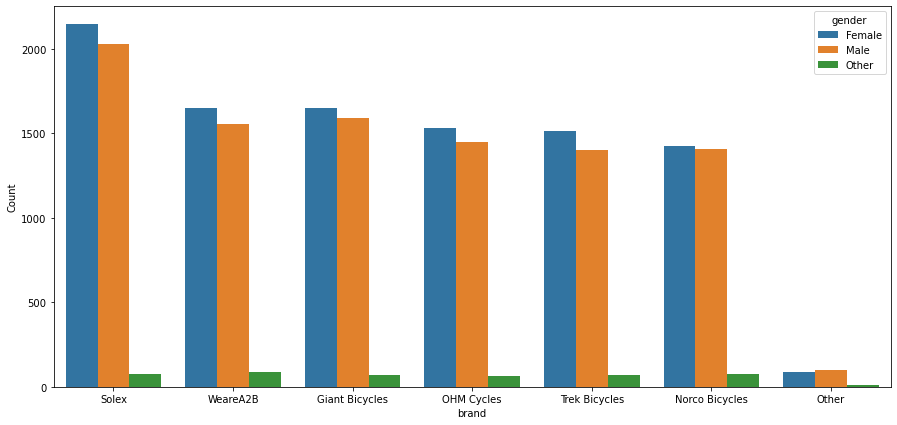

In [89]:
# Brand v/s Count
plt.figure(figsize=(15,7))
sns.barplot(x='brand',y='Count',data=gu,hue='gender')
plt.show()

In [90]:
# Maximum Bikes purchased in Last 3 years

max_bikes=data5.groupby(['brand'])['past_3_years_bike_related_purchases'].sum().reset_index().sort_values(by='past_3_years_bike_related_purchases',ascending=False)
max_bikes.head()

,brand,past_3_years_bike_related_purchases
4,Solex,209174
6,WeareA2B,161894
0,Giant Bicycles,161729
2,OHM Cycles,147384
5,Trek Bicycles,144773


1. In Last 3 years __Solex__ brand has been purchased the maximum no. of times with 2,09,174 purchases.


2. __WeareA2B__ is the 2nd best choice for the customers with 1,61,894 purchases.

### Final Analysis and Recommendations.

1. Sprocket Central Pty Ltd should focus more on __NSW market__ as the Maximum No. of purchases for Bikes have happened there in the last 3 years.


2. Both Males and Females that belong to __Mass Customer__ in wealth segment have purchased more bikes. To be precise, females have purchased more bikes than Males.


3. People working in __Manufacturing category__ are purchasing more bikes around __39,000__ followed by people working in __Financial Services__ __37,000__ bikes.


4. People having age around __43 years__ have purchased more bikes around __14,879__ bikes were purchased.


5. Percentage of Orders that are placed __Online and Offline__ are almost same with __49.16% orders being placed online and 49.06% being placed offline__.


6. __99% percent__ of the Orders get approved without any discrepancy.


7. __Solex brand__ has Maximum no. of order which gets placed and also gets __approved-4,211__ and __cancelled orders also highest for Solex around 42__.


8. Both Males and Females have purchased __Solex bikes__ the Most with __Females purchasing__ __2,144 bikes__ and __Males purchasing__ __2,027 bikes__.


9. As, per the __last 3 years bike purchase__ data Solex brand had the __maximum__ purchases being done with __2,09,174__ bikes being purchased.